# Phase 3

# Shipment optimization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

MAE: 0.58
R² Score: 0.76


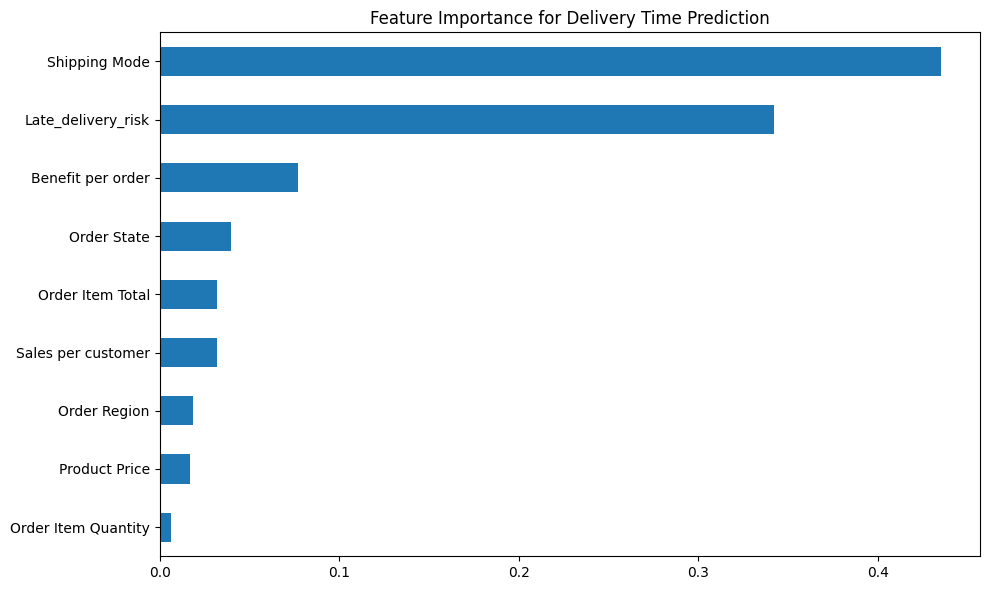

In [2]:
# Load dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

# Select columns
cols = [
    'Days for shipping (real)',  # 🎯 Target
    'Shipping Mode',
    'Order Region',
    'Order State',
    'Order Item Quantity',
    'Product Price',
    'Order Item Total',
    'Sales per customer',
    'Benefit per order',
    'Late_delivery_risk'
]
df = df[cols].dropna()

# Encode categoricals
for col in ['Shipping Mode', 'Order Region', 'Order State']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features & target
X = df.drop('Days for shipping (real)', axis=1)
y = df['Days for shipping (real)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.plot(kind='barh', title='Feature Importance for Delivery Time Prediction', figsize=(10,6))
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation Metrics")
print(f" Mean Absolute Error (MAE): {mae:.2f} days")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f} days")
print(f" R² Score (Explained Variance): {r2:.2f}")


 Model Evaluation Metrics
 Mean Absolute Error (MAE): 0.58 days
 Root Mean Squared Error (RMSE): 0.79 days
 R² Score (Explained Variance): 0.76


In [4]:
import pandas as pd

# Example new order input (use the same encoders!)
new_data = pd.DataFrame([{
    'Shipping Mode': 1,         # e.g., Standard Class
    'Order Region': 2,          # e.g., Central America
    'Order State': 5,           # e.g., California
    'Order Item Quantity': 2,
    'Product Price': 45.99,
    'Order Item Total': 91.98,
    'Sales per customer': 100,
    'Benefit per order': 20,
    'Late_delivery_risk': 1
}])
predicted_days = model.predict(new_data)
print(f" Predicted Delivery Time: {predicted_days[0]:.2f} days")


 Predicted Delivery Time: 1.00 days


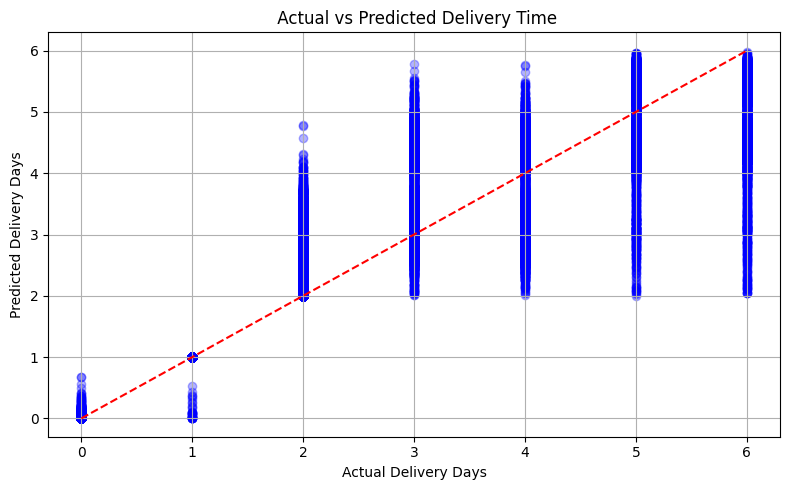

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Delivery Days")
plt.ylabel("Predicted Delivery Days")
plt.title(" Actual vs Predicted Delivery Time")
plt.grid(True)
plt.tight_layout()
plt.show()
